In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
import sys
import os # linux 명령어
# ModelCheckpoint 더이상 모델이 좋아지지 않으면 저장하지 않음
# EarlyStopping 더이상 모델이 좋아지지 않으면 epoch 전부 수행하지 않고 멈추기

# 베스트 모델 만들기

### 그래프로 정확도 알아보기

In [28]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [29]:
df_pre = pd.read_csv("./Dataset/wine.csv", header = None)
df_pre.sample(frac=0.15) # 전체 데이터 15%만 sample로 random하게

,0,1,2,3,4,5,6,7,8,9,10,11,12
5316,6.3,0.18,0.24,3.4,0.053,20.0,119.0,0.99373,3.11,0.52,9.2,6,0
5210,6.8,0.14,0.18,1.4,0.047,30.0,90.0,0.99164,3.27,0.54,11.2,6,0
3518,7.3,0.22,0.50,13.7,0.049,56.0,189.0,0.99940,3.24,0.66,9.0,6,0
1622,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5,0
2443,7.3,0.21,0.29,1.6,0.034,29.0,118.0,0.99170,3.30,0.50,11.0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,6.5,0.22,0.28,3.7,0.059,29.0,151.0,0.99177,3.23,0.41,12.1,7,0
3264,6.5,0.13,0.37,1.0,0.036,48.0,114.0,0.99110,3.41,0.51,11.5,8,0
1653,6.8,0.20,0.59,0.9,0.147,38.0,132.0,0.99300,3.05,0.38,9.1,6,0
2607,6.6,0.22,0.37,1.2,0.059,45.0,199.0,0.99300,3.37,0.55,10.3,7,0


In [33]:
dataset = df_pre.values
X = dataset[:, :-1]
Y = dataset[:, -1]

In [34]:
model_dir = "./model"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

# {epoch:횟수} - {val_loss:손실값}
modelpath = "./model/{epoch:02d} - {val_loss:.4f}.hdf5"

In [61]:
# model set
model = Sequential()
model.add(Dense(30, input_dim = X.shape[1], activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

# model compile
model.compile(loss = "BCE", optimizer = "adam", metrics=["ACC"])

# checkpoint
checkpointer = ModelCheckpoint(modelpath, monitor = 'val_loss', # ACC 넣으면 정확도
                               verbose = 1, save_best_only = True) 
                    # verbose:게이지, save_best_only = True: 좋아지면 save

# model run
# history = model.fit(X, Y, epochs = 200, batch_size = 30, 
#           validation_split = 0.3, callbacks = [checkpointer], verbose = 0)
            # validation_split, sklearn.train_test_split() = train set, test set 자르기

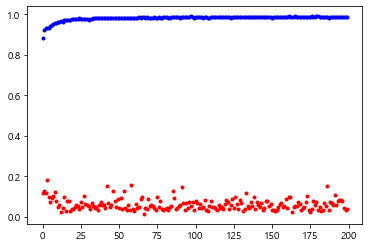

In [52]:
y_vloss = history.history["val_loss"]
y_acc = history.history["ACC"]

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c = "red", markersize = 3)
plt.plot(x_len, y_acc, "o", c = "blue", markersize = 3)
plt.show()

### Early Stopping
- 테스트 오차가 좋아지지 않으면 epoch를 전부 수행하지 않고 멈춤
- 테스트 오차가 좋아지지 않아도 몇번 까지 기다릴지 설정 할 수 있음
- patience = int : int 만큼 기다리고 나아지지 않으면 멈춰!

In [62]:
# early stopping & model save
early_stopping_callback = EarlyStopping(monitor = "val_loss", patience = 100)

model.fit(X, Y, validation_split = 0.2, epochs = 2000, batch_size = 500, 
         callbacks = [early_stopping_callback, checkpointer])

print("\n ACC : %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/2000
 1/11 [=>............................] - ETA: 3s - loss: 26.9604 - ACC: 0.2740
Epoch 00001: val_loss improved from inf to 18.89569, saving model to ./model\01 - 18.8957.hdf5
11/11 [==============================] - 0s 16ms/step - loss: 20.4068 - ACC: 0.3077 - val_loss: 18.8957 - val_ACC: 0.0000e+00
Epoch 2/2000
 1/11 [=>............................] - ETA: 0s - loss: 14.7552 - ACC: 0.2980
Epoch 00002: val_loss improved from 18.89569 to 8.24334, saving model to ./model\02 - 8.2433.hdf5
11/11 [==============================] - 0s 5ms/step - loss: 10.6432 - ACC: 0.3077 - val_loss: 8.2433 - val_ACC: 0.0000e+00
Epoch 3/2000
 1/11 [=>............................] - ETA: 0s - loss: 6.8871 - ACC: 0.2660
Epoch 00003: val_loss improved from 8.24334 to 3.22446, saving model to ./model\03 - 3.2245.hdf5
11/11 [==============================] - 0s 4ms/step - loss: 4.2089 - ACC: 0.3077 - val_loss: 3.2245 - val_ACC: 0.0000e+00
Epoch 4/2000
 1/11 [=>............................] - ETA: 0s 

Epoch 28/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.2114 - ACC: 0.9400
Epoch 00028: val_loss improved from 0.21880 to 0.20060, saving model to ./model\28 - 0.2006.hdf5
11/11 [==============================] - 0s 5ms/step - loss: 0.2247 - ACC: 0.9317 - val_loss: 0.2006 - val_ACC: 0.9654
Epoch 29/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.2271 - ACC: 0.9300
Epoch 00029: val_loss improved from 0.20060 to 0.17977, saving model to ./model\29 - 0.1798.hdf5
11/11 [==============================] - 0s 5ms/step - loss: 0.2145 - ACC: 0.9338 - val_loss: 0.1798 - val_ACC: 0.9700
Epoch 30/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.2103 - ACC: 0.9300
Epoch 00030: val_loss improved from 0.17977 to 0.16715, saving model to ./model\30 - 0.1671.hdf5
11/11 [==============================] - 0s 5ms/step - loss: 0.2063 - ACC: 0.9334 - val_loss: 0.1671 - val_ACC: 0.9723
Epoch 31/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.210

Epoch 57/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.1332 - ACC: 0.9580
Epoch 00057: val_loss did not improve from 0.06137
11/11 [==============================] - 0s 3ms/step - loss: 0.1289 - ACC: 0.9563 - val_loss: 0.0774 - val_ACC: 0.9823
Epoch 58/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.1390 - ACC: 0.9560
Epoch 00058: val_loss did not improve from 0.06137
11/11 [==============================] - 0s 3ms/step - loss: 0.1268 - ACC: 0.9554 - val_loss: 0.0784 - val_ACC: 0.9823
Epoch 59/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.1491 - ACC: 0.9480
Epoch 00059: val_loss improved from 0.06137 to 0.05929, saving model to ./model\59 - 0.0593.hdf5
11/11 [==============================] - 0s 6ms/step - loss: 0.1241 - ACC: 0.9575 - val_loss: 0.0593 - val_ACC: 0.9908
Epoch 60/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.1148 - ACC: 0.9620
Epoch 00060: val_loss improved from 0.05929 to 0.05570, saving model to ./mo

 1/11 [=>............................] - ETA: 0s - loss: 0.0943 - ACC: 0.9780
Epoch 00087: val_loss did not improve from 0.04055
11/11 [==============================] - 0s 4ms/step - loss: 0.0892 - ACC: 0.9715 - val_loss: 0.0473 - val_ACC: 0.9900
Epoch 88/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0941 - ACC: 0.9720
Epoch 00088: val_loss did not improve from 0.04055
11/11 [==============================] - 0s 3ms/step - loss: 0.0863 - ACC: 0.9734 - val_loss: 0.0629 - val_ACC: 0.9792
Epoch 89/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0943 - ACC: 0.9740
Epoch 00089: val_loss did not improve from 0.04055
11/11 [==============================] - 0s 3ms/step - loss: 0.0860 - ACC: 0.9742 - val_loss: 0.0631 - val_ACC: 0.9777
Epoch 90/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.1192 - ACC: 0.9660
Epoch 00090: val_loss did not improve from 0.04055
11/11 [==============================] - 0s 3ms/step - loss: 0.0860 - ACC: 0.9717 - v

 1/11 [=>............................] - ETA: 0s - loss: 0.0569 - ACC: 0.9780
Epoch 00118: val_loss did not improve from 0.03080
11/11 [==============================] - 0s 3ms/step - loss: 0.0684 - ACC: 0.9810 - val_loss: 0.0487 - val_ACC: 0.9862
Epoch 119/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0676 - ACC: 0.9800
Epoch 00119: val_loss did not improve from 0.03080
11/11 [==============================] - 0s 3ms/step - loss: 0.0678 - ACC: 0.9813 - val_loss: 0.0563 - val_ACC: 0.9815
Epoch 120/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0553 - ACC: 0.9880
Epoch 00120: val_loss did not improve from 0.03080
11/11 [==============================] - 0s 3ms/step - loss: 0.0681 - ACC: 0.9806 - val_loss: 0.0366 - val_ACC: 0.9923
Epoch 121/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0899 - ACC: 0.9820
Epoch 00121: val_loss did not improve from 0.03080
11/11 [==============================] - 0s 3ms/step - loss: 0.0684 - ACC: 0.9796 

 1/11 [=>............................] - ETA: 0s - loss: 0.0308 - ACC: 0.9940
Epoch 00149: val_loss did not improve from 0.02831
11/11 [==============================] - 0s 3ms/step - loss: 0.0614 - ACC: 0.9825 - val_loss: 0.0508 - val_ACC: 0.9823
Epoch 150/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0452 - ACC: 0.9860
Epoch 00150: val_loss did not improve from 0.02831
11/11 [==============================] - 0s 3ms/step - loss: 0.0615 - ACC: 0.9827 - val_loss: 0.0510 - val_ACC: 0.9831
Epoch 151/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0544 - ACC: 0.9860
Epoch 00151: val_loss did not improve from 0.02831
11/11 [==============================] - 0s 3ms/step - loss: 0.0605 - ACC: 0.9823 - val_loss: 0.0412 - val_ACC: 0.9885
Epoch 152/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0582 - ACC: 0.9780
Epoch 00152: val_loss did not improve from 0.02831
11/11 [==============================] - 0s 3ms/step - loss: 0.0601 - ACC: 0.9823 

 1/11 [=>............................] - ETA: 0s - loss: 0.0545 - ACC: 0.9800
Epoch 00180: val_loss did not improve from 0.02087
11/11 [==============================] - 0s 3ms/step - loss: 0.0557 - ACC: 0.9825 - val_loss: 0.0343 - val_ACC: 0.9892
Epoch 181/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0360 - ACC: 0.9880
Epoch 00181: val_loss did not improve from 0.02087
11/11 [==============================] - 0s 3ms/step - loss: 0.0549 - ACC: 0.9840 - val_loss: 0.0393 - val_ACC: 0.9892
Epoch 182/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0649 - ACC: 0.9700
Epoch 00182: val_loss did not improve from 0.02087
11/11 [==============================] - 0s 3ms/step - loss: 0.0547 - ACC: 0.9846 - val_loss: 0.0437 - val_ACC: 0.9885
Epoch 183/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0508 - ACC: 0.9840
Epoch 00183: val_loss did not improve from 0.02087
11/11 [==============================] - 0s 3ms/step - loss: 0.0584 - ACC: 0.9819 

 1/11 [=>............................] - ETA: 0s - loss: 0.0544 - ACC: 0.9820
Epoch 00211: val_loss did not improve from 0.01627
11/11 [==============================] - 0s 3ms/step - loss: 0.0517 - ACC: 0.9850 - val_loss: 0.0348 - val_ACC: 0.9892
Epoch 212/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0625 - ACC: 0.9820
Epoch 00212: val_loss did not improve from 0.01627
11/11 [==============================] - 0s 3ms/step - loss: 0.0530 - ACC: 0.9850 - val_loss: 0.0258 - val_ACC: 0.9923
Epoch 213/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0555 - ACC: 0.9840
Epoch 00213: val_loss did not improve from 0.01627
11/11 [==============================] - 0s 3ms/step - loss: 0.0517 - ACC: 0.9861 - val_loss: 0.0186 - val_ACC: 0.9969
Epoch 214/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0495 - ACC: 0.9800
Epoch 00214: val_loss did not improve from 0.01627
11/11 [==============================] - 0s 3ms/step - loss: 0.0542 - ACC: 0.9836 

 1/11 [=>............................] - ETA: 0s - loss: 0.0343 - ACC: 0.9860
Epoch 00242: val_loss did not improve from 0.01627
11/11 [==============================] - 0s 3ms/step - loss: 0.0499 - ACC: 0.9856 - val_loss: 0.0344 - val_ACC: 0.9900
Epoch 243/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0416 - ACC: 0.9920
Epoch 00243: val_loss did not improve from 0.01627
11/11 [==============================] - 0s 3ms/step - loss: 0.0495 - ACC: 0.9850 - val_loss: 0.0291 - val_ACC: 0.9908
Epoch 244/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0457 - ACC: 0.9820
Epoch 00244: val_loss did not improve from 0.01627
11/11 [==============================] - 0s 3ms/step - loss: 0.0522 - ACC: 0.9854 - val_loss: 0.0211 - val_ACC: 0.9938
Epoch 245/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0526 - ACC: 0.9860
Epoch 00245: val_loss did not improve from 0.01627
11/11 [==============================] - 0s 3ms/step - loss: 0.0511 - ACC: 0.9865 

 1/11 [=>............................] - ETA: 0s - loss: 0.0514 - ACC: 0.9880
Epoch 00273: val_loss did not improve from 0.01542
11/11 [==============================] - 0s 3ms/step - loss: 0.0499 - ACC: 0.9854 - val_loss: 0.0413 - val_ACC: 0.9877
Epoch 274/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0345 - ACC: 0.9920
Epoch 00274: val_loss did not improve from 0.01542
11/11 [==============================] - 0s 3ms/step - loss: 0.0493 - ACC: 0.9860 - val_loss: 0.0188 - val_ACC: 0.9954
Epoch 275/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0294 - ACC: 0.9880
Epoch 00275: val_loss did not improve from 0.01542
11/11 [==============================] - 0s 3ms/step - loss: 0.0516 - ACC: 0.9838 - val_loss: 0.0263 - val_ACC: 0.9915
Epoch 276/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0619 - ACC: 0.9800
Epoch 00276: val_loss did not improve from 0.01542
11/11 [==============================] - 0s 3ms/step - loss: 0.0482 - ACC: 0.9858 

 1/11 [=>............................] - ETA: 0s - loss: 0.0630 - ACC: 0.9780
Epoch 00304: val_loss did not improve from 0.01542
11/11 [==============================] - 0s 3ms/step - loss: 0.0491 - ACC: 0.9848 - val_loss: 0.0297 - val_ACC: 0.9915
Epoch 305/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0366 - ACC: 0.9900
Epoch 00305: val_loss did not improve from 0.01542
11/11 [==============================] - 0s 3ms/step - loss: 0.0495 - ACC: 0.9860 - val_loss: 0.0446 - val_ACC: 0.9854
Epoch 306/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0315 - ACC: 0.9920
Epoch 00306: val_loss did not improve from 0.01542
11/11 [==============================] - 0s 3ms/step - loss: 0.0466 - ACC: 0.9873 - val_loss: 0.0375 - val_ACC: 0.9862
Epoch 307/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0594 - ACC: 0.9860
Epoch 00307: val_loss did not improve from 0.01542
11/11 [==============================] - 0s 3ms/step - loss: 0.0473 - ACC: 0.9871 

 1/11 [=>............................] - ETA: 0s - loss: 0.0521 - ACC: 0.9880
Epoch 00335: val_loss did not improve from 0.01519
11/11 [==============================] - 0s 3ms/step - loss: 0.0449 - ACC: 0.9867 - val_loss: 0.0360 - val_ACC: 0.9885
Epoch 336/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0203 - ACC: 0.9980
Epoch 00336: val_loss did not improve from 0.01519
11/11 [==============================] - 0s 3ms/step - loss: 0.0448 - ACC: 0.9877 - val_loss: 0.0403 - val_ACC: 0.9885
Epoch 337/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0451 - ACC: 0.9880
Epoch 00337: val_loss did not improve from 0.01519
11/11 [==============================] - 0s 3ms/step - loss: 0.0483 - ACC: 0.9860 - val_loss: 0.0456 - val_ACC: 0.9838
Epoch 338/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0319 - ACC: 0.9900
Epoch 00338: val_loss did not improve from 0.01519
11/11 [==============================] - 0s 3ms/step - loss: 0.0485 - ACC: 0.9869 

 1/11 [=>............................] - ETA: 0s - loss: 0.0209 - ACC: 0.9960
Epoch 00366: val_loss did not improve from 0.01519
11/11 [==============================] - 0s 3ms/step - loss: 0.0427 - ACC: 0.9885 - val_loss: 0.0295 - val_ACC: 0.9923
Epoch 367/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0893 - ACC: 0.9820
Epoch 00367: val_loss did not improve from 0.01519
11/11 [==============================] - 0s 3ms/step - loss: 0.0423 - ACC: 0.9879 - val_loss: 0.0273 - val_ACC: 0.9923
Epoch 368/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0453 - ACC: 0.9840
Epoch 00368: val_loss did not improve from 0.01519
11/11 [==============================] - 0s 3ms/step - loss: 0.0441 - ACC: 0.9894 - val_loss: 0.0414 - val_ACC: 0.9846
Epoch 369/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0436 - ACC: 0.9840
Epoch 00369: val_loss did not improve from 0.01519
11/11 [==============================] - 0s 3ms/step - loss: 0.0454 - ACC: 0.9865 

 1/11 [=>............................] - ETA: 0s - loss: 0.0398 - ACC: 0.9860
Epoch 00397: val_loss did not improve from 0.01519
11/11 [==============================] - 0s 3ms/step - loss: 0.0437 - ACC: 0.9873 - val_loss: 0.0394 - val_ACC: 0.9862
Epoch 398/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0410 - ACC: 0.9900
Epoch 00398: val_loss did not improve from 0.01519
11/11 [==============================] - 0s 3ms/step - loss: 0.0443 - ACC: 0.9873 - val_loss: 0.0183 - val_ACC: 0.9954
Epoch 399/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0549 - ACC: 0.9820
Epoch 00399: val_loss did not improve from 0.01519
11/11 [==============================] - 0s 3ms/step - loss: 0.0454 - ACC: 0.9867 - val_loss: 0.0221 - val_ACC: 0.9946
Epoch 400/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0426 - ACC: 0.9860
Epoch 00400: val_loss did not improve from 0.01519
11/11 [==============================] - 0s 3ms/step - loss: 0.0417 - ACC: 0.9888 

Epoch 428/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0716 - ACC: 0.9800
Epoch 00428: val_loss did not improve from 0.01416
11/11 [==============================] - 0s 3ms/step - loss: 0.0432 - ACC: 0.9873 - val_loss: 0.0277 - val_ACC: 0.9938
Epoch 429/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0355 - ACC: 0.9920
Epoch 00429: val_loss did not improve from 0.01416
11/11 [==============================] - 0s 3ms/step - loss: 0.0446 - ACC: 0.9869 - val_loss: 0.0414 - val_ACC: 0.9869
Epoch 430/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0410 - ACC: 0.9880
Epoch 00430: val_loss did not improve from 0.01416
11/11 [==============================] - 0s 3ms/step - loss: 0.0414 - ACC: 0.9886 - val_loss: 0.0483 - val_ACC: 0.9800
Epoch 431/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0592 - ACC: 0.9880
Epoch 00431: val_loss did not improve from 0.01416
11/11 [==============================] - 0s 3ms/step - loss: 0.0407

 1/11 [=>............................] - ETA: 0s - loss: 0.0191 - ACC: 0.9940
Epoch 00459: val_loss did not improve from 0.01416
11/11 [==============================] - 0s 3ms/step - loss: 0.0421 - ACC: 0.9881 - val_loss: 0.0388 - val_ACC: 0.9877
Epoch 460/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0370 - ACC: 0.9880
Epoch 00460: val_loss did not improve from 0.01416
11/11 [==============================] - 0s 3ms/step - loss: 0.0417 - ACC: 0.9881 - val_loss: 0.0302 - val_ACC: 0.9923
Epoch 461/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0346 - ACC: 0.9900
Epoch 00461: val_loss did not improve from 0.01416
11/11 [==============================] - 0s 3ms/step - loss: 0.0397 - ACC: 0.9894 - val_loss: 0.0258 - val_ACC: 0.9938
Epoch 462/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0362 - ACC: 0.9860
Epoch 00462: val_loss did not improve from 0.01416
11/11 [==============================] - 0s 3ms/step - loss: 0.0405 - ACC: 0.9877 

 1/11 [=>............................] - ETA: 0s - loss: 0.0423 - ACC: 0.9900
Epoch 00490: val_loss did not improve from 0.01416
11/11 [==============================] - 0s 3ms/step - loss: 0.0399 - ACC: 0.9892 - val_loss: 0.0414 - val_ACC: 0.9869
Epoch 491/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0485 - ACC: 0.9900
Epoch 00491: val_loss did not improve from 0.01416
11/11 [==============================] - 0s 3ms/step - loss: 0.0400 - ACC: 0.9881 - val_loss: 0.0380 - val_ACC: 0.9877
Epoch 492/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0394 - ACC: 0.9860
Epoch 00492: val_loss improved from 0.01416 to 0.01375, saving model to ./model\492 - 0.0138.hdf5
11/11 [==============================] - 0s 6ms/step - loss: 0.0400 - ACC: 0.9886 - val_loss: 0.0138 - val_ACC: 0.9954
Epoch 493/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0415 - ACC: 0.9840
Epoch 00493: val_loss did not improve from 0.01375
11/11 [============================

Epoch 521/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0266 - ACC: 0.9920
Epoch 00521: val_loss did not improve from 0.01346
11/11 [==============================] - 0s 4ms/step - loss: 0.0390 - ACC: 0.9888 - val_loss: 0.0319 - val_ACC: 0.9923
Epoch 522/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0202 - ACC: 0.9960
Epoch 00522: val_loss did not improve from 0.01346
11/11 [==============================] - 0s 3ms/step - loss: 0.0376 - ACC: 0.9906 - val_loss: 0.0340 - val_ACC: 0.9892
Epoch 523/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0372 - ACC: 0.9860
Epoch 00523: val_loss did not improve from 0.01346
11/11 [==============================] - 0s 3ms/step - loss: 0.0387 - ACC: 0.9902 - val_loss: 0.0282 - val_ACC: 0.9931
Epoch 524/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0180 - ACC: 0.9940
Epoch 00524: val_loss did not improve from 0.01346
11/11 [==============================] - 0s 3ms/step - loss: 0.0384

 1/11 [=>............................] - ETA: 0s - loss: 0.0477 - ACC: 0.9860
Epoch 00552: val_loss did not improve from 0.01346
11/11 [==============================] - 0s 3ms/step - loss: 0.0384 - ACC: 0.9898 - val_loss: 0.0359 - val_ACC: 0.9885
Epoch 553/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0265 - ACC: 0.9940
Epoch 00553: val_loss did not improve from 0.01346
11/11 [==============================] - 0s 3ms/step - loss: 0.0416 - ACC: 0.9879 - val_loss: 0.0615 - val_ACC: 0.9815
Epoch 554/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0476 - ACC: 0.9860
Epoch 00554: val_loss did not improve from 0.01346
11/11 [==============================] - 0s 3ms/step - loss: 0.0405 - ACC: 0.9896 - val_loss: 0.0233 - val_ACC: 0.9938
Epoch 555/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0439 - ACC: 0.9880
Epoch 00555: val_loss did not improve from 0.01346
11/11 [==============================] - 0s 3ms/step - loss: 0.0377 - ACC: 0.9885 

 1/11 [=>............................] - ETA: 0s - loss: 0.0514 - ACC: 0.9880
Epoch 00583: val_loss did not improve from 0.01346
11/11 [==============================] - 0s 3ms/step - loss: 0.0370 - ACC: 0.9896 - val_loss: 0.0252 - val_ACC: 0.9938
Epoch 584/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0543 - ACC: 0.9840
Epoch 00584: val_loss did not improve from 0.01346
11/11 [==============================] - 0s 3ms/step - loss: 0.0375 - ACC: 0.9898 - val_loss: 0.0301 - val_ACC: 0.9931
Epoch 585/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0355 - ACC: 0.9900
Epoch 00585: val_loss did not improve from 0.01346
11/11 [==============================] - 0s 3ms/step - loss: 0.0388 - ACC: 0.9898 - val_loss: 0.0280 - val_ACC: 0.9931
Epoch 586/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0587 - ACC: 0.9840
Epoch 00586: val_loss did not improve from 0.01346
11/11 [==============================] - 0s 3ms/step - loss: 0.0364 - ACC: 0.9911 

 1/11 [=>............................] - ETA: 0s - loss: 0.0361 - ACC: 0.9900
Epoch 00614: val_loss did not improve from 0.01052
11/11 [==============================] - 0s 3ms/step - loss: 0.0393 - ACC: 0.9892 - val_loss: 0.0255 - val_ACC: 0.9938
Epoch 615/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0437 - ACC: 0.9900
Epoch 00615: val_loss did not improve from 0.01052
11/11 [==============================] - 0s 3ms/step - loss: 0.0376 - ACC: 0.9906 - val_loss: 0.0217 - val_ACC: 0.9938
Epoch 616/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0498 - ACC: 0.9840
Epoch 00616: val_loss did not improve from 0.01052
11/11 [==============================] - 0s 3ms/step - loss: 0.0368 - ACC: 0.9890 - val_loss: 0.0249 - val_ACC: 0.9938
Epoch 617/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0346 - ACC: 0.9900
Epoch 00617: val_loss did not improve from 0.01052
11/11 [==============================] - 0s 3ms/step - loss: 0.0361 - ACC: 0.9898 

 1/11 [=>............................] - ETA: 0s - loss: 0.0314 - ACC: 0.9880
Epoch 00645: val_loss did not improve from 0.01052
11/11 [==============================] - 0s 3ms/step - loss: 0.0361 - ACC: 0.9910 - val_loss: 0.0477 - val_ACC: 0.9854
Epoch 646/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0232 - ACC: 0.9980
Epoch 00646: val_loss did not improve from 0.01052
11/11 [==============================] - 0s 3ms/step - loss: 0.0367 - ACC: 0.9906 - val_loss: 0.0287 - val_ACC: 0.9938
Epoch 647/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0172 - ACC: 0.9940
Epoch 00647: val_loss did not improve from 0.01052
11/11 [==============================] - 0s 3ms/step - loss: 0.0363 - ACC: 0.9906 - val_loss: 0.0239 - val_ACC: 0.9938
Epoch 648/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0684 - ACC: 0.9840
Epoch 00648: val_loss did not improve from 0.01052
11/11 [==============================] - 0s 3ms/step - loss: 0.0359 - ACC: 0.9904 

 1/11 [=>............................] - ETA: 0s - loss: 0.0233 - ACC: 0.9940
Epoch 00676: val_loss did not improve from 0.01052
11/11 [==============================] - 0s 3ms/step - loss: 0.0356 - ACC: 0.9910 - val_loss: 0.0260 - val_ACC: 0.9938
Epoch 677/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0433 - ACC: 0.9900
Epoch 00677: val_loss did not improve from 0.01052
11/11 [==============================] - 0s 3ms/step - loss: 0.0351 - ACC: 0.9902 - val_loss: 0.0283 - val_ACC: 0.9908
Epoch 678/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0509 - ACC: 0.9880
Epoch 00678: val_loss did not improve from 0.01052
11/11 [==============================] - 0s 3ms/step - loss: 0.0355 - ACC: 0.9915 - val_loss: 0.0244 - val_ACC: 0.9938
Epoch 679/2000
 1/11 [=>............................] - ETA: 0s - loss: 0.0377 - ACC: 0.9900
Epoch 00679: val_loss did not improve from 0.01052
11/11 [==============================] - 0s 3ms/step - loss: 0.0359 - ACC: 0.9902 

In [66]:
# pima indian의 자료 중에서 30% 만 샘플로 추출
# monitor는 에러(손실) 값
# 기다리는 횟수는 50회
# 저장은 pima_model dir에
# 마지막 저장된 model을 가져와서 정확도의 값을 출력
model_dir = "./pima_model"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
modelpath = model_dir + "/{epoch:02d} - {val_loss:.4f}.hdf5"

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv("./Dataset/pima-indians-diabetes.csv", header = None)

df.sample(frac=0.3)

dataset = df.values
X = dataset[:, :-1]
Y = dataset[:, -1]

model = Sequential()
model.add(Dense(30, input_dim = X.shape[1], activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

# model compile
model.compile(loss = "BCE", optimizer = "adam", metrics=["ACC"])

checkpointer = ModelCheckpoint(modelpath, monitor = 'val_loss', # ACC 넣으면 정확도
                               verbose = 1, save_best_only = True) 

early_stopping_callback = EarlyStopping(monitor = "val_loss", 
                                        patience = 50)

model.fit(X, Y, validation_split = 0.2, epochs = 2000, batch_size = 500, 
         callbacks = [early_stopping_callback, checkpointer])

print("\n ACC : %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 5.1835 - ACC: 0.6440
Epoch 00001: val_loss improved from inf to 5.58841, saving model to ./pima_model\01 - 5.5884.hdf5
2/2 [==============================] - 0s 140ms/step - loss: 5.1909 - ACC: 0.6450 - val_loss: 5.5884 - val_ACC: 0.5649
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 4.5996 - ACC: 0.6500
Epoch 00002: val_loss improved from 5.58841 to 5.00745, saving model to ./pima_model\02 - 5.0074.hdf5
2/2 [==============================] - 0s 29ms/step - loss: 4.5951 - ACC: 0.6531 - val_loss: 5.0074 - val_ACC: 0.5390
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 4.0522 - ACC: 0.6540
Epoch 00003: val_loss improved from 5.00745 to 4.46276, saving model to ./pima_model\03 - 4.4628.hdf5
2/2 [==============================] - 0s 30ms/step - loss: 4.0928 - ACC: 0.6401 - val_loss: 4.4628 - val_ACC: 0.5130
Epoch 4/2000
1/2 [==============>...............] - ETA: 0s - loss: 4.1284 -

2/2 [==============================] - 0s 31ms/step - loss: 0.7256 - ACC: 0.6629 - val_loss: 0.7033 - val_ACC: 0.5844
Epoch 28/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7245 - ACC: 0.6600
Epoch 00028: val_loss improved from 0.70330 to 0.69966, saving model to ./pima_model\28 - 0.6997.hdf5
2/2 [==============================] - 0s 32ms/step - loss: 0.7223 - ACC: 0.6580 - val_loss: 0.6997 - val_ACC: 0.6039
Epoch 29/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7178 - ACC: 0.6440
Epoch 00029: val_loss improved from 0.69966 to 0.69708, saving model to ./pima_model\29 - 0.6971.hdf5
2/2 [==============================] - 0s 30ms/step - loss: 0.7192 - ACC: 0.6564 - val_loss: 0.6971 - val_ACC: 0.6039
Epoch 30/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7156 - ACC: 0.6460
Epoch 00030: val_loss improved from 0.69708 to 0.69479, saving model to ./pima_model\30 - 0.6948.hdf5
2/2 [==============================] - 0s 30ms/step - loss: 0.7162 - A

1/2 [==============>...............] - ETA: 0s - loss: 0.6728 - ACC: 0.6600
Epoch 00054: val_loss improved from 0.67357 to 0.67142, saving model to ./pima_model\54 - 0.6714.hdf5
2/2 [==============================] - 0s 33ms/step - loss: 0.6744 - ACC: 0.6531 - val_loss: 0.6714 - val_ACC: 0.6753
Epoch 55/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6740 - ACC: 0.6640
Epoch 00055: val_loss improved from 0.67142 to 0.66788, saving model to ./pima_model\55 - 0.6679.hdf5
2/2 [==============================] - 0s 32ms/step - loss: 0.6695 - ACC: 0.6580 - val_loss: 0.6679 - val_ACC: 0.6753
Epoch 56/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6596 - ACC: 0.6740
Epoch 00056: val_loss improved from 0.66788 to 0.66750, saving model to ./pima_model\56 - 0.6675.hdf5
2/2 [==============================] - 0s 31ms/step - loss: 0.6635 - ACC: 0.6629 - val_loss: 0.6675 - val_ACC: 0.6753
Epoch 57/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6566 - ACC: 0

1/2 [==============>...............] - ETA: 0s - loss: 0.5881 - ACC: 0.7080
Epoch 00083: val_loss did not improve from 0.64627
2/2 [==============================] - 0s 24ms/step - loss: 0.5965 - ACC: 0.6954 - val_loss: 0.6476 - val_ACC: 0.6558
Epoch 84/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5946 - ACC: 0.7040
Epoch 00084: val_loss improved from 0.64627 to 0.64519, saving model to ./pima_model\84 - 0.6452.hdf5
2/2 [==============================] - 0s 48ms/step - loss: 0.5948 - ACC: 0.6938 - val_loss: 0.6452 - val_ACC: 0.6688
Epoch 85/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5970 - ACC: 0.6920
Epoch 00085: val_loss improved from 0.64519 to 0.64303, saving model to ./pima_model\85 - 0.6430.hdf5
2/2 [==============================] - 0s 45ms/step - loss: 0.5940 - ACC: 0.6889 - val_loss: 0.6430 - val_ACC: 0.6688
Epoch 86/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6025 - ACC: 0.6780
Epoch 00086: val_loss improved from 0.64303 t

Epoch 113/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5944 - ACC: 0.6880
Epoch 00113: val_loss did not improve from 0.63323
2/2 [==============================] - 0s 19ms/step - loss: 0.5810 - ACC: 0.7003 - val_loss: 0.6373 - val_ACC: 0.6558
Epoch 114/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5682 - ACC: 0.7060
Epoch 00114: val_loss improved from 0.63323 to 0.63281, saving model to ./pima_model\114 - 0.6328.hdf5
2/2 [==============================] - 0s 31ms/step - loss: 0.5797 - ACC: 0.6987 - val_loss: 0.6328 - val_ACC: 0.6753
Epoch 115/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5656 - ACC: 0.6960
Epoch 00115: val_loss improved from 0.63281 to 0.63037, saving model to ./pima_model\115 - 0.6304.hdf5
2/2 [==============================] - 0s 31ms/step - loss: 0.5790 - ACC: 0.6938 - val_loss: 0.6304 - val_ACC: 0.6818
Epoch 116/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5859 - ACC: 0.6780
Epoch 00116: val_loss imp

Epoch 143/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5769 - ACC: 0.6940
Epoch 00143: val_loss did not improve from 0.61972
2/2 [==============================] - 0s 20ms/step - loss: 0.5789 - ACC: 0.6987 - val_loss: 0.6424 - val_ACC: 0.6818
Epoch 144/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5819 - ACC: 0.6960
Epoch 00144: val_loss did not improve from 0.61972
2/2 [==============================] - 0s 19ms/step - loss: 0.5765 - ACC: 0.6954 - val_loss: 0.6299 - val_ACC: 0.6753
Epoch 145/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5964 - ACC: 0.6820
Epoch 00145: val_loss did not improve from 0.61972
2/2 [==============================] - 0s 19ms/step - loss: 0.5699 - ACC: 0.6971 - val_loss: 0.6218 - val_ACC: 0.6623
Epoch 146/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5641 - ACC: 0.7000
Epoch 00146: val_loss improved from 0.61972 to 0.61955, saving model to ./pima_model\146 - 0.6196.hdf5
2/2 [=====================

1/2 [==============>...............] - ETA: 0s - loss: 0.5745 - ACC: 0.6820
Epoch 00174: val_loss did not improve from 0.61783
2/2 [==============================] - 0s 18ms/step - loss: 0.5661 - ACC: 0.6971 - val_loss: 0.6398 - val_ACC: 0.6753
Epoch 175/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5898 - ACC: 0.6700
Epoch 00175: val_loss did not improve from 0.61783
2/2 [==============================] - 0s 19ms/step - loss: 0.5677 - ACC: 0.6938 - val_loss: 0.6314 - val_ACC: 0.6753
Epoch 176/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5580 - ACC: 0.7000
Epoch 00176: val_loss did not improve from 0.61783
2/2 [==============================] - 0s 19ms/step - loss: 0.5635 - ACC: 0.6954 - val_loss: 0.6208 - val_ACC: 0.6623
Epoch 177/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5669 - ACC: 0.6960
Epoch 00177: val_loss did not improve from 0.61783
2/2 [==============================] - 0s 17ms/step - loss: 0.5620 - ACC: 0.6938 - val_loss: 

Epoch 205/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5485 - ACC: 0.7120
Epoch 00205: val_loss did not improve from 0.61541
2/2 [==============================] - 0s 21ms/step - loss: 0.5589 - ACC: 0.7052 - val_loss: 0.6256 - val_ACC: 0.6753
Epoch 206/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5525 - ACC: 0.7020
Epoch 00206: val_loss did not improve from 0.61541
2/2 [==============================] - 0s 20ms/step - loss: 0.5598 - ACC: 0.7003 - val_loss: 0.6220 - val_ACC: 0.6818
Epoch 207/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5467 - ACC: 0.7220
Epoch 00207: val_loss improved from 0.61541 to 0.61377, saving model to ./pima_model\207 - 0.6138.hdf5
2/2 [==============================] - 0s 39ms/step - loss: 0.5581 - ACC: 0.7052 - val_loss: 0.6138 - val_ACC: 0.6558
Epoch 208/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5418 - ACC: 0.7120
Epoch 00208: val_loss improved from 0.61377 to 0.61152, saving model to ./pim

Epoch 236/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5469 - ACC: 0.6900
Epoch 00236: val_loss did not improve from 0.61150
2/2 [==============================] - 0s 19ms/step - loss: 0.5558 - ACC: 0.6889 - val_loss: 0.6122 - val_ACC: 0.6753
Epoch 237/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5528 - ACC: 0.6860
Epoch 00237: val_loss did not improve from 0.61150
2/2 [==============================] - 0s 18ms/step - loss: 0.5551 - ACC: 0.6906 - val_loss: 0.6155 - val_ACC: 0.6753
Epoch 238/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5620 - ACC: 0.6980
Epoch 00238: val_loss did not improve from 0.61150
2/2 [==============================] - 0s 19ms/step - loss: 0.5552 - ACC: 0.7020 - val_loss: 0.6188 - val_ACC: 0.6753
Epoch 239/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5628 - ACC: 0.7000
Epoch 00239: val_loss did not improve from 0.61150
2/2 [==============================] - 0s 21ms/step - loss: 0.5542 - ACC: 0.70

1/2 [==============>...............] - ETA: 0s - loss: 0.5727 - ACC: 0.6840
Epoch 00267: val_loss improved from 0.60995 to 0.60935, saving model to ./pima_model\267 - 0.6094.hdf5
2/2 [==============================] - 0s 40ms/step - loss: 0.5596 - ACC: 0.6954 - val_loss: 0.6094 - val_ACC: 0.6883
Epoch 268/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5460 - ACC: 0.7020
Epoch 00268: val_loss did not improve from 0.60935
2/2 [==============================] - 0s 18ms/step - loss: 0.5572 - ACC: 0.6987 - val_loss: 0.6094 - val_ACC: 0.6753
Epoch 269/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5464 - ACC: 0.7080
Epoch 00269: val_loss did not improve from 0.60935
2/2 [==============================] - 0s 19ms/step - loss: 0.5516 - ACC: 0.6971 - val_loss: 0.6128 - val_ACC: 0.6753
Epoch 270/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5485 - ACC: 0.7080
Epoch 00270: val_loss did not improve from 0.60935
2/2 [==============================] - 0s

1/2 [==============>...............] - ETA: 0s - loss: 0.5589 - ACC: 0.6940
Epoch 00298: val_loss did not improve from 0.60925
2/2 [==============================] - 0s 20ms/step - loss: 0.5482 - ACC: 0.7020 - val_loss: 0.6134 - val_ACC: 0.6753
Epoch 299/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5609 - ACC: 0.6960
Epoch 00299: val_loss did not improve from 0.60925
2/2 [==============================] - 0s 20ms/step - loss: 0.5482 - ACC: 0.7020 - val_loss: 0.6135 - val_ACC: 0.6753
Epoch 300/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5538 - ACC: 0.7000
Epoch 00300: val_loss did not improve from 0.60925
2/2 [==============================] - 0s 19ms/step - loss: 0.5481 - ACC: 0.7036 - val_loss: 0.6138 - val_ACC: 0.6883
Epoch 301/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5562 - ACC: 0.6960
Epoch 00301: val_loss did not improve from 0.60925
2/2 [==============================] - 0s 19ms/step - loss: 0.5485 - ACC: 0.7052 - val_loss: 

Epoch 329/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5470 - ACC: 0.7160
Epoch 00329: val_loss did not improve from 0.60692
2/2 [==============================] - 0s 18ms/step - loss: 0.5508 - ACC: 0.7036 - val_loss: 0.6096 - val_ACC: 0.6818
Epoch 330/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5409 - ACC: 0.7140
Epoch 00330: val_loss did not improve from 0.60692
2/2 [==============================] - 0s 20ms/step - loss: 0.5509 - ACC: 0.7068 - val_loss: 0.6090 - val_ACC: 0.7013
Epoch 331/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5439 - ACC: 0.7000
Epoch 00331: val_loss did not improve from 0.60692
2/2 [==============================] - 0s 18ms/step - loss: 0.5464 - ACC: 0.7020 - val_loss: 0.6173 - val_ACC: 0.6688
Epoch 332/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5467 - ACC: 0.6980
Epoch 00332: val_loss did not improve from 0.60692
2/2 [==============================] - 0s 19ms/step - loss: 0.5469 - ACC: 0.70

1/2 [==============>...............] - ETA: 0s - loss: 0.5425 - ACC: 0.7100
Epoch 00360: val_loss did not improve from 0.60267
2/2 [==============================] - 0s 19ms/step - loss: 0.5427 - ACC: 0.7085 - val_loss: 0.6095 - val_ACC: 0.6818
Epoch 361/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5349 - ACC: 0.7020
Epoch 00361: val_loss did not improve from 0.60267
2/2 [==============================] - 0s 20ms/step - loss: 0.5414 - ACC: 0.7085 - val_loss: 0.6051 - val_ACC: 0.6883
Epoch 362/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5528 - ACC: 0.7060
Epoch 00362: val_loss improved from 0.60267 to 0.60242, saving model to ./pima_model\362 - 0.6024.hdf5
2/2 [==============================] - 0s 42ms/step - loss: 0.5396 - ACC: 0.7085 - val_loss: 0.6024 - val_ACC: 0.6883
Epoch 363/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5440 - ACC: 0.7040
Epoch 00363: val_loss did not improve from 0.60242
2/2 [==============================] - 0s

Epoch 392/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5547 - ACC: 0.6940
Epoch 00392: val_loss did not improve from 0.60242
2/2 [==============================] - 0s 18ms/step - loss: 0.5444 - ACC: 0.7020 - val_loss: 0.6318 - val_ACC: 0.6688
Epoch 393/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5490 - ACC: 0.7000
Epoch 00393: val_loss did not improve from 0.60242
2/2 [==============================] - 0s 18ms/step - loss: 0.5440 - ACC: 0.7003 - val_loss: 0.6151 - val_ACC: 0.6753
Epoch 394/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5274 - ACC: 0.7180
Epoch 00394: val_loss did not improve from 0.60242
2/2 [==============================] - 0s 18ms/step - loss: 0.5358 - ACC: 0.7085 - val_loss: 0.6045 - val_ACC: 0.6883
Epoch 395/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5170 - ACC: 0.7360
Epoch 00395: val_loss did not improve from 0.60242
2/2 [==============================] - 0s 20ms/step - loss: 0.5355 - ACC: 0.71

Epoch 423/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5236 - ACC: 0.7200
Epoch 00423: val_loss did not improve from 0.60012
2/2 [==============================] - 0s 20ms/step - loss: 0.5414 - ACC: 0.7052 - val_loss: 0.6178 - val_ACC: 0.6818
Epoch 424/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5538 - ACC: 0.7080
Epoch 00424: val_loss did not improve from 0.60012
2/2 [==============================] - 0s 21ms/step - loss: 0.5362 - ACC: 0.7117 - val_loss: 0.6045 - val_ACC: 0.6818
Epoch 425/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5349 - ACC: 0.7160
Epoch 00425: val_loss did not improve from 0.60012
2/2 [==============================] - 0s 20ms/step - loss: 0.5320 - ACC: 0.7199 - val_loss: 0.6037 - val_ACC: 0.6753
Epoch 426/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5537 - ACC: 0.7020
Epoch 00426: val_loss did not improve from 0.60012
2/2 [==============================] - 0s 20ms/step - loss: 0.5345 - ACC: 0.71

Epoch 455/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5335 - ACC: 0.7240
Epoch 00455: val_loss did not improve from 0.60012
2/2 [==============================] - 0s 20ms/step - loss: 0.5301 - ACC: 0.7166 - val_loss: 0.6082 - val_ACC: 0.6818
Epoch 456/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5377 - ACC: 0.7080
Epoch 00456: val_loss did not improve from 0.60012
2/2 [==============================] - 0s 20ms/step - loss: 0.5305 - ACC: 0.7101 - val_loss: 0.6072 - val_ACC: 0.6818
Epoch 457/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5388 - ACC: 0.7120
Epoch 00457: val_loss did not improve from 0.60012
2/2 [==============================] - 0s 19ms/step - loss: 0.5306 - ACC: 0.7101 - val_loss: 0.6034 - val_ACC: 0.6753
Epoch 458/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5281 - ACC: 0.7140
Epoch 00458: val_loss did not improve from 0.60012
2/2 [==============================] - 0s 20ms/step - loss: 0.5294 - ACC: 0.71

### 실습

In [75]:
def create_dataset(df):
    dataset = df.values
    X = dataset[:, :-1]
    Y = dataset[:,-1]
    return (X,Y)

def create_model(X,Y):
    model = Sequential()
    model.add(Dense(30,  input_dim=X.shape[1], activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(8, activation='relu'))
    return model

def create_dir(dir_name):
    # 모델 저장 폴더 만들기
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)

In [ ]:
df_pre = pd.read_csv('../dataset/pima-indians-diabetes.csv', header=None)
df = df_pre.sample(frac=0.15)

In [ ]:
X, Y=create_dataset(df)
model = create_model(X, Y)

model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

create_dir('pima_model')
modelpath = "./DL/pima_model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)

model.fit(X, Y, validation_split=0.2, epochs=3500, 
          batch_size=500, verbose=0, 
          callbacks=[early_stopping_callback,checkpointer])

### 모델 불러오기

In [69]:
from keras.models import load_model

model_1 = load_model("./pima_model/96 - 0.6361.hdf5")
print(model_1.evaluate(X, Y)[1])
model_1.summary()

24/24 [==============================] - 0s 877us/step - loss: 0.5972 - ACC: 0.6849
0.6848958134651184
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 30)                270       
                                                                 
 dense_37 (Dense)            (None, 12)                372       
                                                                 
 dense_38 (Dense)            (None, 1)                 13        
                                                                 
Total params: 655
Trainable params: 655
Non-trainable params: 0
_________________________________________________________________


### 딥러닝으로 선형 회귀

In [72]:
# seed 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [74]:
df = pd.read_csv("./Dataset/housing.csv", delim_whitespace = True, header = None)

In [78]:
X, Y = create_dataset(df)

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, 
                                                   random_state = seed)

# 모델 정의
model = Sequential()
model.add(Dense(30, input_dim = X.shape[1], activation = "relu"))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1)) # 분류 하는게 아니기 때문에 output층만 넣어주면 됨

# 모델 설정
model.compile(loss = "MSE", optimizer = "adam")

# 모델 실행
model.fit(X_train, Y_train, epochs = 200, batch_size = 10)

Epoch 1/200
36/36 [==============================] - 0s 879us/step - loss: 1191.3270
Epoch 2/200
36/36 [==============================] - 0s 823us/step - loss: 245.6603
Epoch 3/200
36/36 [==============================] - 0s 922us/step - loss: 139.6486
Epoch 4/200
36/36 [==============================] - 0s 855us/step - loss: 94.7137
Epoch 5/200
36/36 [==============================] - 0s 902us/step - loss: 79.3995
Epoch 6/200
36/36 [==============================] - 0s 936us/step - loss: 82.9331
Epoch 7/200
36/36 [==============================] - 0s 912us/step - loss: 73.9985
Epoch 8/200
36/36 [==============================] - 0s 882us/step - loss: 69.8325
Epoch 9/200
36/36 [==============================] - 0s 888us/step - loss: 73.9861
Epoch 10/200
36/36 [==============================] - 0s 884us/step - loss: 65.4000
Epoch 11/200
36/36 [==============================] - 0s 882us/step - loss: 63.0158
Epoch 12/200
36/36 [==============================] - 0s 851us/step - loss: 64.84

36/36 [==============================] - 0s 926us/step - loss: 25.4773
Epoch 99/200
36/36 [==============================] - 0s 770us/step - loss: 25.9061
Epoch 100/200
36/36 [==============================] - 0s 728us/step - loss: 26.7533
Epoch 101/200
36/36 [==============================] - 0s 755us/step - loss: 28.3876
Epoch 102/200
36/36 [==============================] - 0s 708us/step - loss: 26.2880
Epoch 103/200
36/36 [==============================] - 0s 701us/step - loss: 26.4611
Epoch 104/200
36/36 [==============================] - 0s 742us/step - loss: 27.9140
Epoch 105/200
36/36 [==============================] - 0s 834us/step - loss: 30.0229
Epoch 106/200
36/36 [==============================] - 0s 733us/step - loss: 26.6530
Epoch 107/200
36/36 [==============================] - 0s 683us/step - loss: 26.3906
Epoch 108/200
36/36 [==============================] - 0s 851us/step - loss: 28.0197
Epoch 109/200
36/36 [==============================] - 0s 1ms/step - loss: 27.93

36/36 [==============================] - 0s 719us/step - loss: 21.5934
Epoch 195/200
36/36 [==============================] - 0s 780us/step - loss: 21.5106
Epoch 196/200
36/36 [==============================] - 0s 769us/step - loss: 20.8629
Epoch 197/200
36/36 [==============================] - 0s 725us/step - loss: 21.6407
Epoch 198/200
36/36 [==============================] - 0s 711us/step - loss: 21.2327
Epoch 199/200
36/36 [==============================] - 0s 736us/step - loss: 21.9416
Epoch 200/200
36/36 [==============================] - 0s 706us/step - loss: 26.0078


In [83]:
Y_prediction = model.predict(X_test).flatten() # 1차원으로 형 변환
Y_prediction

array([19.877052  , 19.66398   , 25.216846  ,  8.107042  , 11.661325  ,
       15.956578  , 21.376907  , 19.856289  , 12.225715  , 14.5429535 ,
        6.8514333 , 11.489713  , 15.630711  ,  3.0263422 , 37.827297  ,
       26.014845  , 21.012411  , 28.854229  , 25.465384  , 19.217316  ,
       20.442122  , 21.675404  , 14.371797  , 24.313854  , 18.0909    ,
        9.660403  , 14.192597  , 19.6424    , 30.37129   , 16.913893  ,
       13.679952  , 15.721239  , 14.232022  , 18.094883  , 25.061699  ,
       19.744362  ,  4.9429297 , 21.204182  , 10.127927  , 12.324111  ,
       20.87815   , 16.153646  , 15.155949  , 15.509277  , 15.519721  ,
       21.296532  , 11.329627  , 23.972744  ,  7.462847  , 18.555294  ,
       14.632919  , 14.575588  , 18.449507  , 26.767986  , 13.663051  ,
       14.561099  , 14.956643  ,  7.000858  ,  9.851575  , 17.636057  ,
       14.423682  , 15.88252   , 26.713722  , 27.03122   , 20.10191   ,
       24.011885  , 17.275654  , 13.877675  , 13.544572  , 19.90

In [84]:
# 예측 값과 실제 값 출력
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격 : {:.3f}, 예상가격 : {:.3f}".format(label, prediction))

실제가격 : 22.600, 예상가격 : 19.877
실제가격 : 50.000, 예상가격 : 19.664
실제가격 : 23.000, 예상가격 : 25.217
실제가격 : 8.300, 예상가격 : 8.107
실제가격 : 21.200, 예상가격 : 11.661
실제가격 : 19.900, 예상가격 : 15.957
실제가격 : 20.600, 예상가격 : 21.377
실제가격 : 18.700, 예상가격 : 19.856
실제가격 : 16.100, 예상가격 : 12.226
실제가격 : 18.600, 예상가격 : 14.543


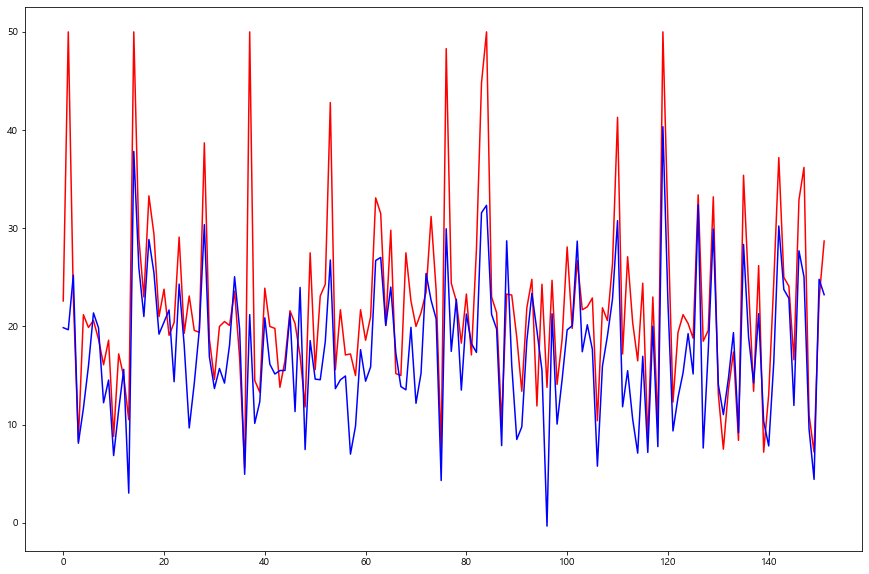

In [94]:
plt.figure(figsize = (15, 10))
plt.plot(Y_test, c = "red")
plt.plot(Y_prediction, c = "blue")
plt.show()

# 오후

### CNN Basic

### 전처리

In [97]:
from keras.datasets import mnist

In [167]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [168]:
print("Train_data : {:04d}, Test_data : {:04d}".format(X_train.shape[0], X_test.shape[0]))

Train_data : 60000, Test_data : 10000


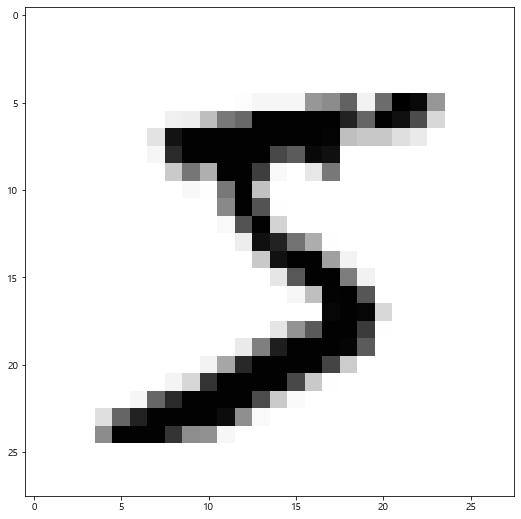

In [169]:
plt.figure(figsize = (9, 9))
plt.imshow(X_train[0], cmap = "Greys")
plt.show()

In [170]:
for row in X_train[0]:
    for col in row:
        sys.stdout.write("%3d" % col)
    sys.stdout.write("\n")

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [171]:
print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
print(X_train.shape)

(60000, 28, 28)
(60000, 784)


In [172]:
# 정규화 : 서능을 좋게 하기 위해서 -> 숫자를 0~1 사이의 수로 변환
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
# X_train[0][:250]

In [163]:
Y_train[0]

5

In [164]:
from keras.utils import np_utils
# 타겟 값을 분류해서 category로 변경
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)

In [175]:
print(Y_train[0], Y_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### 모델 기본 프레임 만들기

In [176]:
# 모델 저장 폴더 설정
model_dir = "./CNN_model"
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

# 모델 저장 조건 설정
modelpath = "./" + model_dir + "/{epoch:02d}-{val_loss:.4f}.hdf5"

In [177]:
# 모델 설정
model = Sequential()
model.add(Dense(512, input_dim = X_train.shape[1], activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [178]:
# 체크포인트 설정
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = "val_loss",
                             verbose = 1, save_best_only = True)

# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = "val_loss", patience = 10)

In [182]:
# 모델 컴파일
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics=["ACC"])

In [183]:
# 모델 fit
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 200,
         batch_size = 200, verbose = 0, callbacks = [checkpointer, early_stopping_callback])


Epoch 00001: val_loss improved from inf to 0.15075, saving model to ././CNN_model\01-0.1508.hdf5

Epoch 00002: val_loss improved from 0.15075 to 0.10530, saving model to ././CNN_model\02-0.1053.hdf5

Epoch 00003: val_loss improved from 0.10530 to 0.08199, saving model to ././CNN_model\03-0.0820.hdf5

Epoch 00004: val_loss improved from 0.08199 to 0.07904, saving model to ././CNN_model\04-0.0790.hdf5

Epoch 00005: val_loss improved from 0.07904 to 0.06885, saving model to ././CNN_model\05-0.0688.hdf5

Epoch 00006: val_loss improved from 0.06885 to 0.06552, saving model to ././CNN_model\06-0.0655.hdf5

Epoch 00007: val_loss improved from 0.06552 to 0.06255, saving model to ././CNN_model\07-0.0626.hdf5

Epoch 00008: val_loss improved from 0.06255 to 0.06242, saving model to ././CNN_model\08-0.0624.hdf5

Epoch 00009: val_loss improved from 0.06242 to 0.06175, saving model to ././CNN_model\09-0.0618.hdf5

Epoch 00010: val_loss did not improve from 0.06175

Epoch 00011: val_loss did not imp

In [184]:
# 테스트 정확도 출력
print("\n Test ACC : %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0772 - ACC: 0.9808

 Test ACC : 0.9808


In [189]:
# 테스트 set의 오차 출력
y_vloss = history.history["val_loss"]

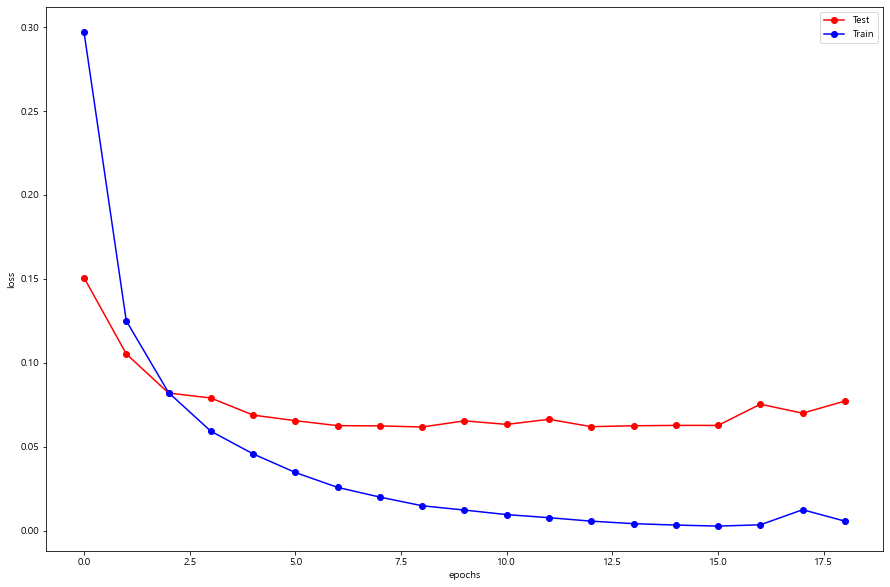

In [195]:
# 학습 셋 오차 출력
y_loss = history.history["loss"]

x_len = np.arange(len(y_loss))
plt.figure(figsize = (15, 10))
plt.plot(x_len, y_vloss, marker = "o", c = "red", label = "Test")
plt.plot(x_len, y_loss, marker = "o", c = "blue", label = "Train")

plt.legend(loc = "best")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()